# Data Understanding

## Before You Start
Make sure that we have access to the GPU by using `nvidia-smi` command to find

In [1]:
!nvidia-smi

Thu Jan 25 16:32:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.12                 Driver Version: 546.12       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090      WDDM  | 00000000:01:00.0  On |                  Off |
| 37%   53C    P8              19W / 450W |    994MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Import libraries
To read the csv and convert to panda series dataframe and plotting graph purposes

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the data from Airline_sentiment and convert with encoding
# Due to Western European character set found
data = pd.read_csv("Airline_sentiment.csv", encoding = "ISO-8859-1") 
data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [4]:
data.tail()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
14635,681679794,False,finalized,3,2/25/15 19:46,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2/22/15 12:01,5.695880e+17,NaN,NaN
14636,681679795,False,finalized,3,2/25/15 19:14,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2/22/15 11:59,5.695870e+17,Texas,NaN
14637,681679796,False,finalized,3,2/25/15 19:04,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2/22/15 11:59,5.695870e+17,"Nigeria,lagos",NaN
14638,681679797,False,finalized,3,2/25/15 18:59,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2/22/15 11:59,5.695870e+17,New Jersey,Eastern Time (US & Canada)
14639,681679798,False,finalized,3,2/25/15 19:06,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2/22/15 11:58,5.695870e+17,"dallas, TX",NaN


In [5]:
data.info() # To find the dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _unit_id                      14640 non-null  int64  
 1   _golden                       14640 non-null  bool   
 2   _unit_state                   14640 non-null  object 
 3   _trusted_judgments            14640 non-null  int64  
 4   _last_judgment_at             14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment:confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason:confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [6]:
data.nunique()

_unit_id                        14640
_golden                             2
_unit_state                         3
_trusted_judgments                 28
_last_judgment_at                 648
airline_sentiment                   3
airline_sentiment:confidence     1023
negativereason                     10
negativereason:confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                    6804
tweet_id                         2434
tweet_location                   3081
user_timezone                      85
dtype: int64

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
_unit_id,14640.0,NaN,NaN,NaN,681495695.030806,85043.138204,681448150.0,681453595.5,681457817.5,681462274.25,681679798.0
_golden,14640,2,False,14600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_unit_state,14640,3,finalized,14583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
_trusted_judgments,14640.0,NaN,NaN,NaN,3.618648,11.858704,2.0,3.0,3.0,3.0,248.0
_last_judgment_at,14584,648,2/25/15 19:11,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment:confidence,14640.0,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1.0,1.0,1.0
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason:confidence,10522.0,NaN,NaN,NaN,0.638298,0.33044,0.0,0.3606,0.6706,1.0,1.0
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()

_unit_id                            0
_golden                             0
_unit_state                         0
_trusted_judgments                  0
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
negativereason                   5462
negativereason:confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

[ 5462  4118 14600 14608 13621  4733  4820]


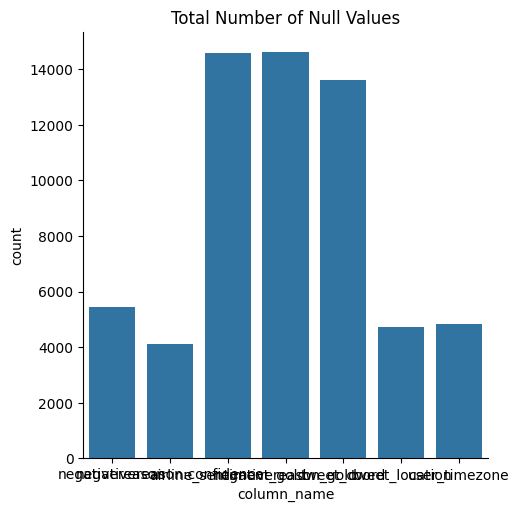

In [9]:
# Show the graph of total number of null values
total_null = data[['negativereason', 'negativereason:confidence', 'airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone']].isnull().sum().values
print(total_null)
null_counts = pd.DataFrame({
"column_name": ['negativereason', 'negativereason:confidence', 'airline_sentiment_gold', 'negativereason_gold','tweet_coord', 'tweet_location', 'user_timezone'],
"count": total_null
})

sns.catplot(x="column_name", y="count", data=null_counts, kind="bar")
plt.title('Total Number of Null Values')
plt.show()

In [10]:
# Show the percentage of the null value
null_percentage = data.isnull().sum()/len(data)*100
null_percentage

_unit_id                         0.000000
_golden                          0.000000
_unit_state                      0.000000
_trusted_judgments               0.000000
_last_judgment_at                0.382514
airline_sentiment                0.000000
airline_sentiment:confidence     0.000000
negativereason                  37.308743
negativereason:confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_id                         0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

# Data Preparation

In [11]:
# Split the data into category and numerical category for graph
category_var=data.select_dtypes(include=['object']).columns
num_var = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(category_var)
print("Numerical Variables:")
print(num_var)

Categorical Variables:
Index(['_unit_state', '_last_judgment_at', 'airline_sentiment',
       'negativereason', 'airline', 'airline_sentiment_gold', 'name',
       'negativereason_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
Numerical Variables:
['_unit_id', '_trusted_judgments', 'airline_sentiment:confidence', 'negativereason:confidence', 'retweet_count', 'tweet_id']


Text(0.5, 0.98, 'Pair Plot for Columns (Not Object)')

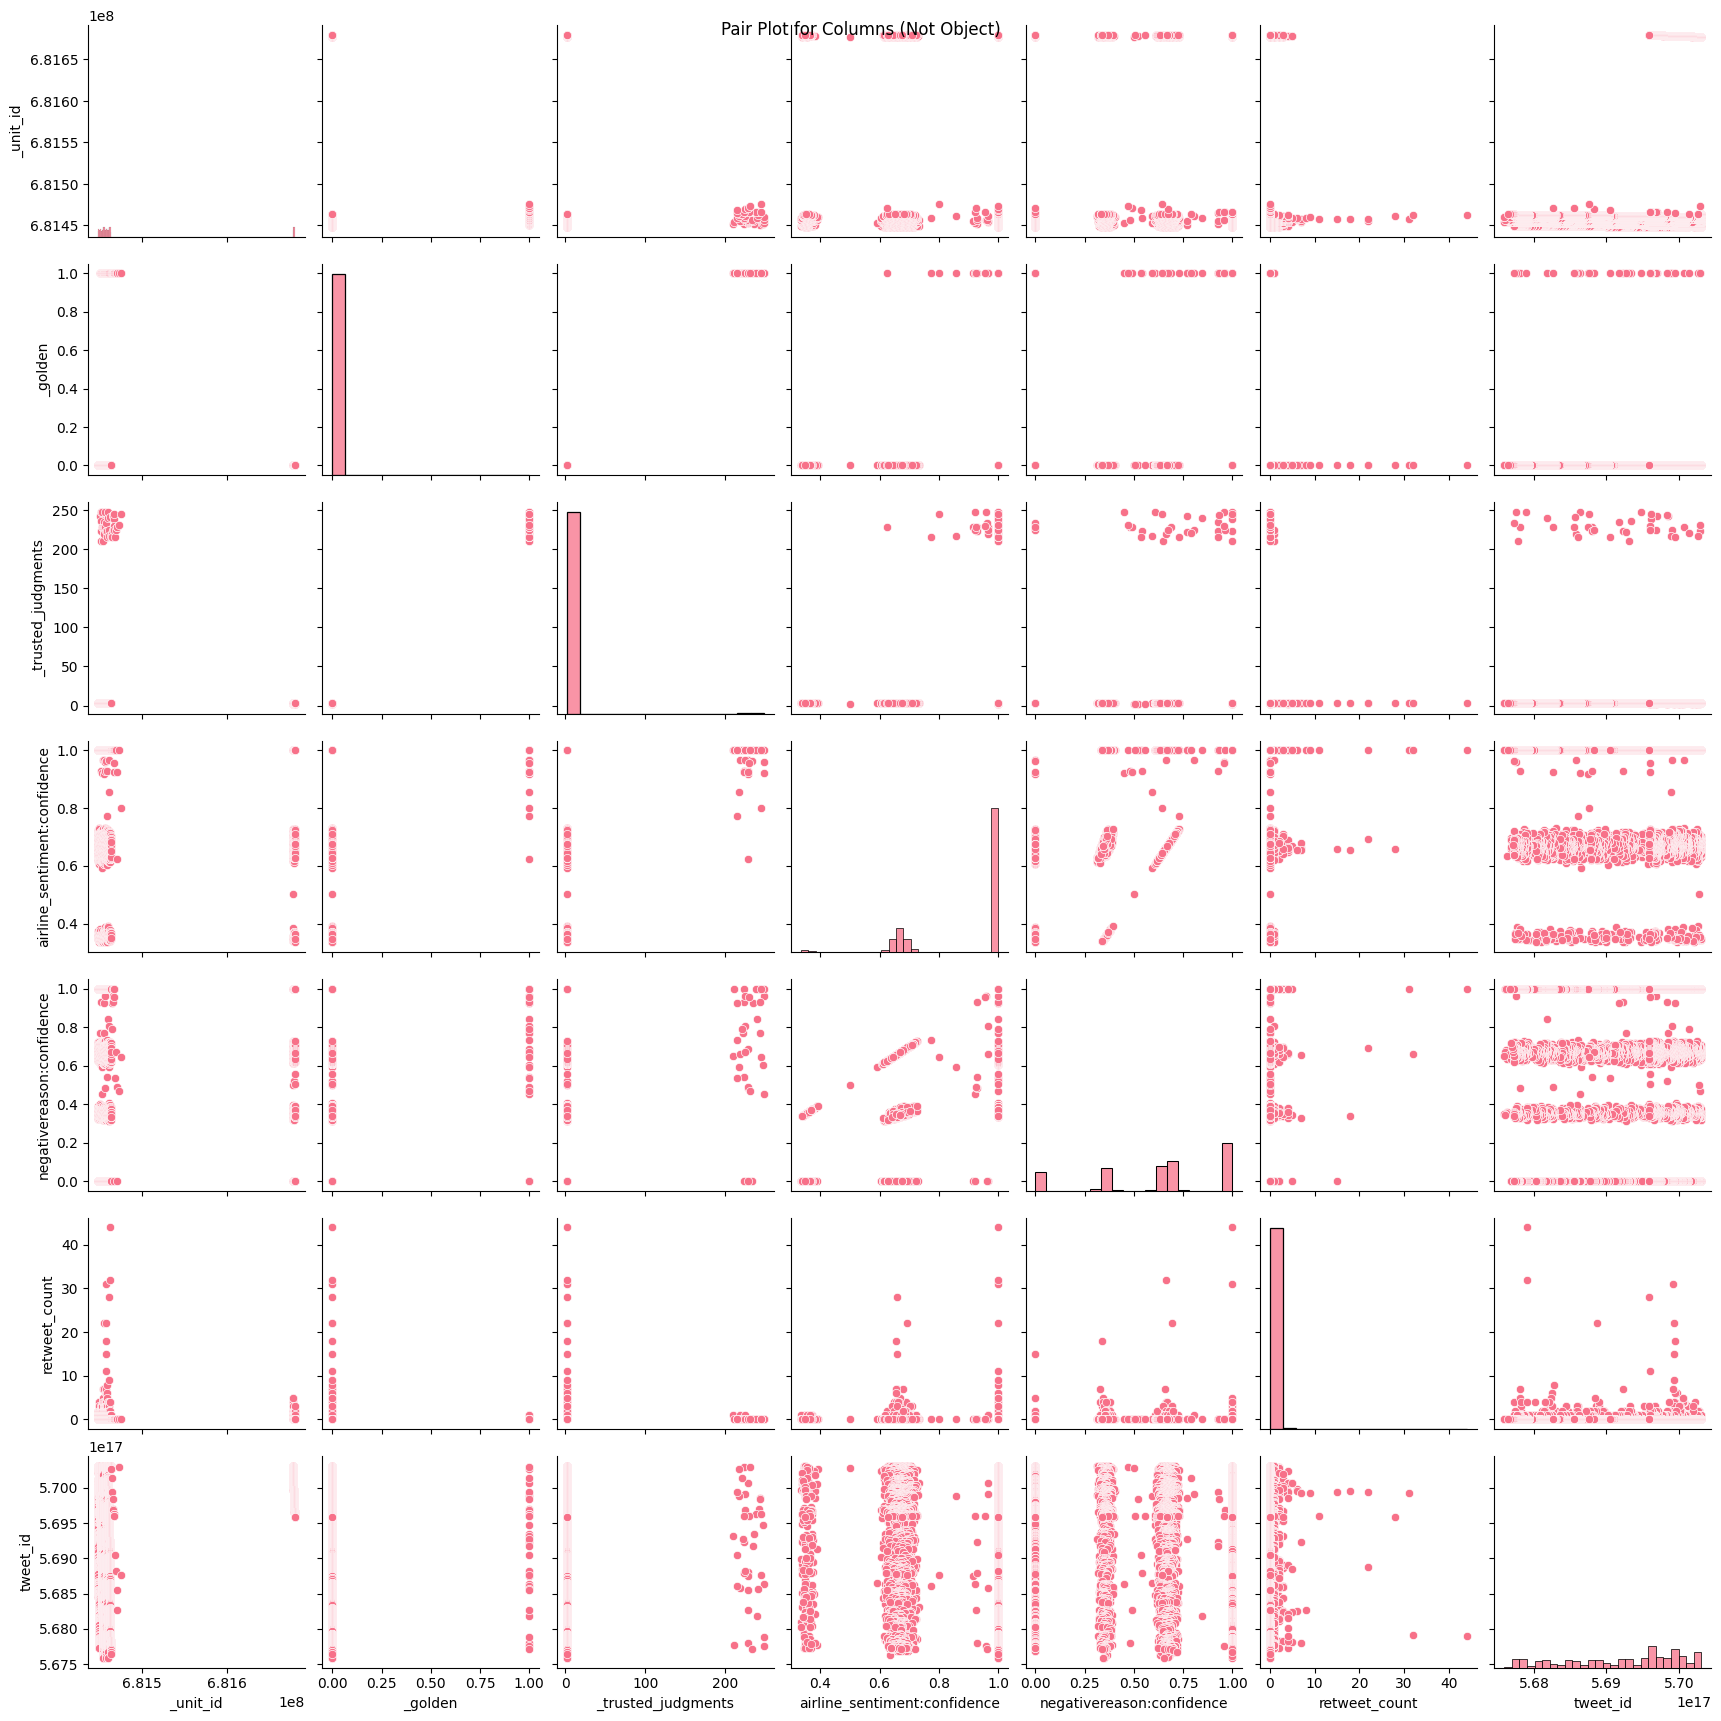

In [12]:
# Pair Plot as used to find the relationships between variables within the dataset
sns.set_palette("husl")
sns.pairplot(data)
plt.suptitle('Pair Plot for Columns (Not Object)')

_unit_id


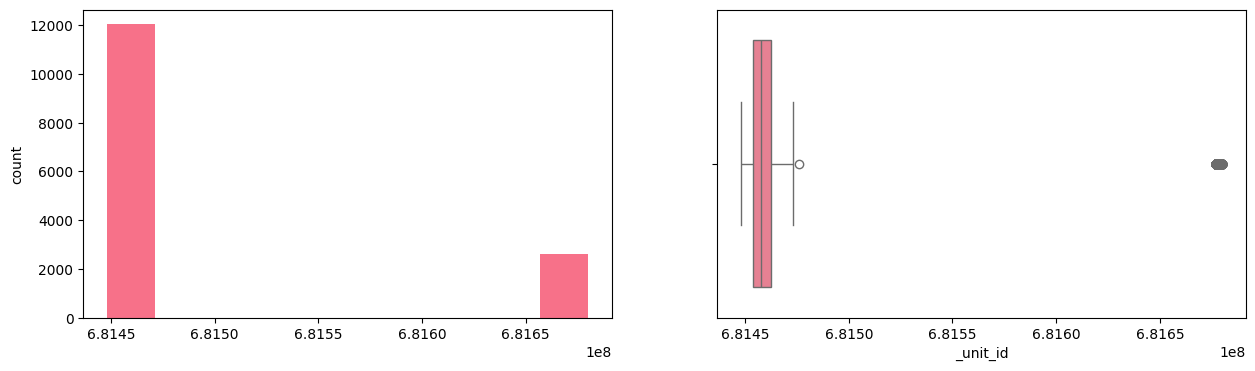

_trusted_judgments


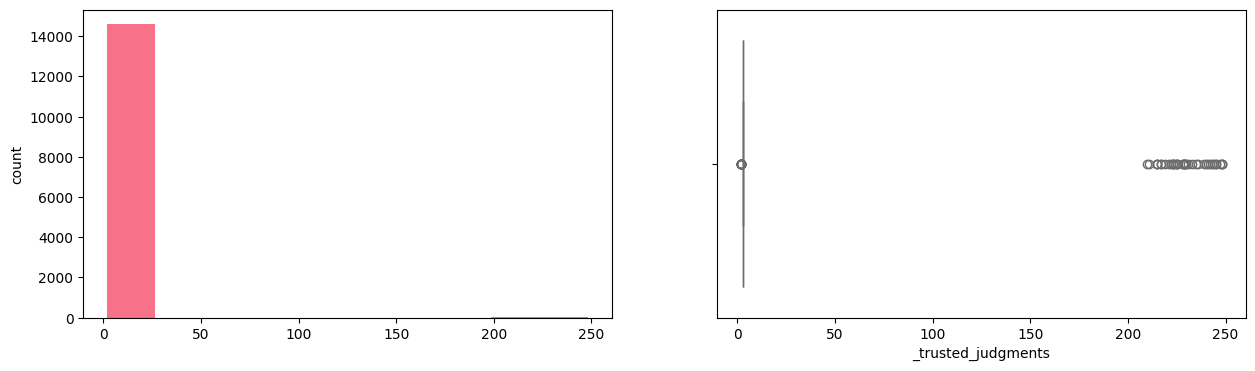

airline_sentiment:confidence


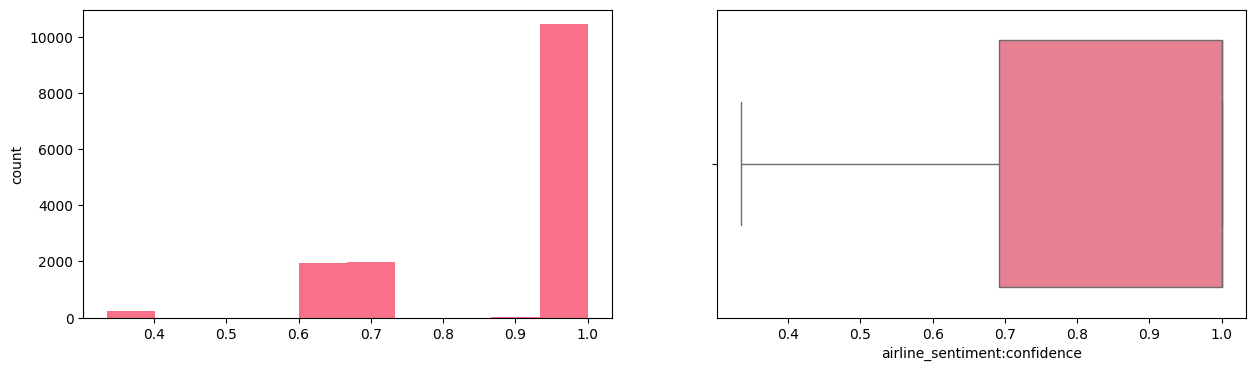

negativereason:confidence


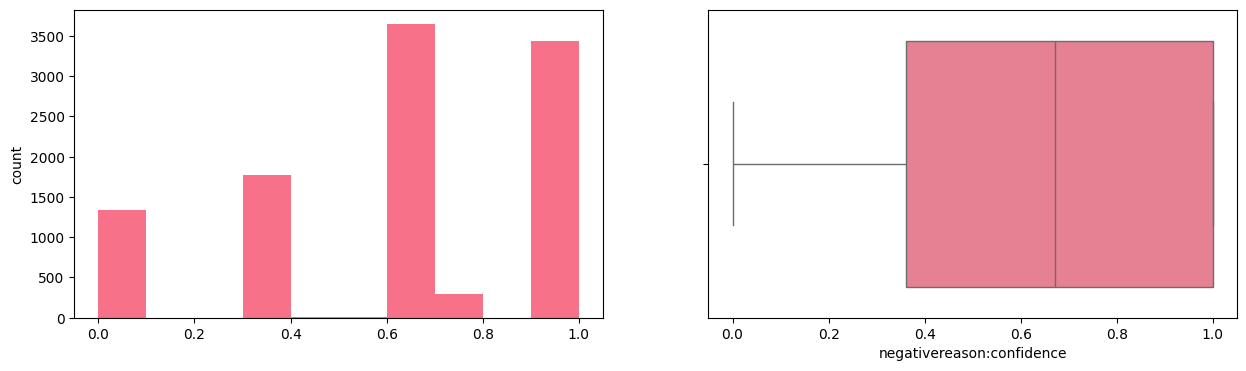

retweet_count


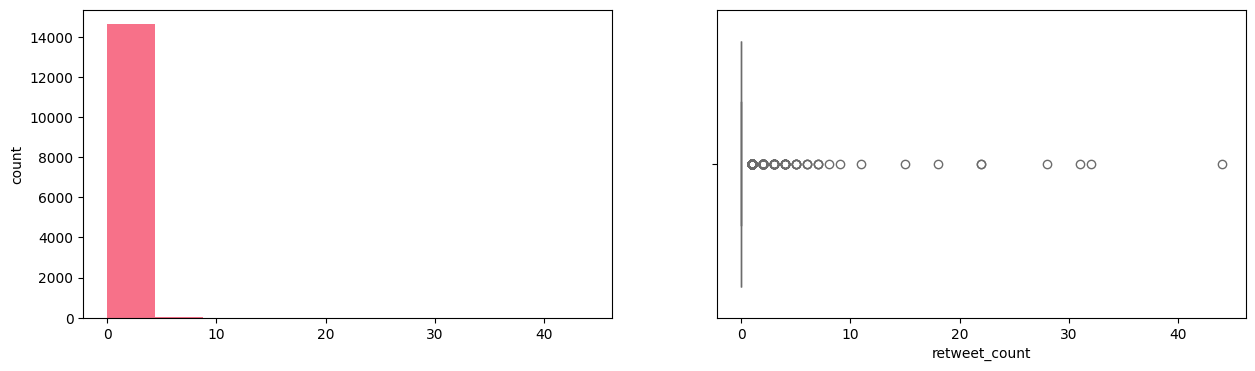

tweet_id


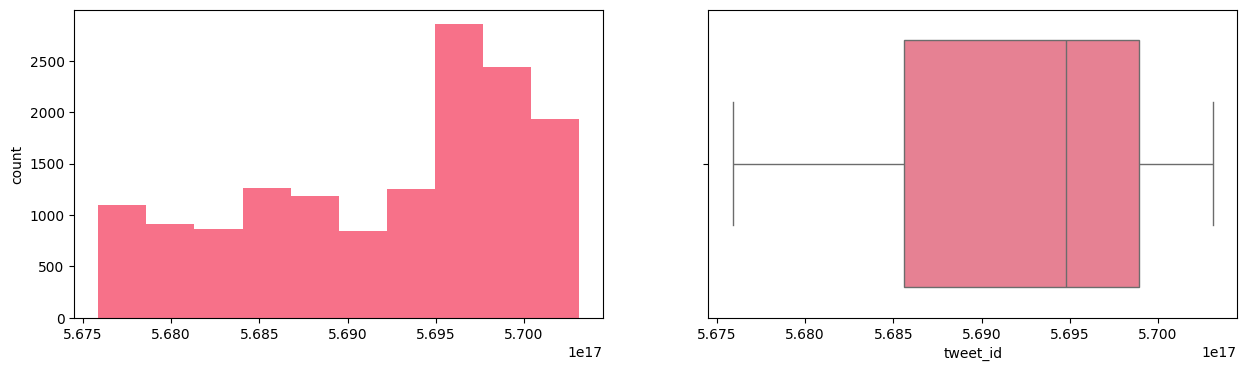

In [13]:
# Histogram for count and check the outlier for numerical value
for col in num_var:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

<AxesSubplot:>

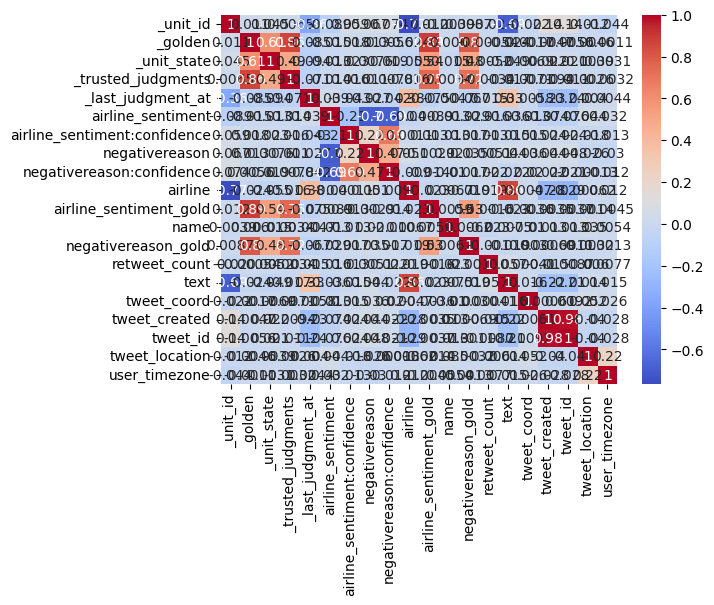

In [14]:
#All String and id/name related has converted to category
data["_unit_id"]=data["_unit_id"].astype('category').cat.codes
data["_unit_state"]=data["_unit_state"].astype('category').cat.codes
data["_trusted_judgments"]=data["_trusted_judgments"].astype('category').cat.codes
data["_last_judgment_at"]=data["_last_judgment_at"].astype('category').cat.codes
data["airline_sentiment_gold"]=data["airline_sentiment_gold"].astype('category').cat.codes
data["negativereason_gold"]=data["negativereason_gold"].astype('category').cat.codes
data["_golden"]=data["_golden"].astype('category').cat.codes
data["airline_sentiment"]=data["airline_sentiment"].astype('category').cat.codes
data["negativereason"]=data["negativereason"].astype('category').cat.codes
data["airline"]=data["airline"].astype('category').cat.codes
data["text"]=data["text"].astype('category').cat.codes
data["tweet_coord"]=data["tweet_coord"].astype('category').cat.codes
data["tweet_created"]=data["tweet_created"].astype('category').cat.codes
data["tweet_id"]=data["tweet_id"].astype('category').cat.codes
data["tweet_location"]=data["tweet_location"].astype('category').cat.codes
data["user_timezone"]=data["user_timezone"].astype('category').cat.codes
data["name"]=data["name"].astype('category').cat.codes
conf_matrix = data.corr()
sns.heatmap(conf_matrix, cmap = "coolwarm", annot=True)

In [15]:
## Drop unnecessary columns
def drop_columns(data):
    try:
        data.drop("_unit_id", axis=1, inplace=True)
        data.drop("_unit_state", axis = 1, inplace=True)
        data.drop("_trusted_judgments", axis = 1, inplace=True)
        data.drop("_last_judgment_at", axis = 1, inplace=True) #56 null
        data.drop("airline_sentiment_gold", axis = 1, inplace=True) # 14600 null
        data.drop("negativereason_gold", axis = 1, inplace=True) # 14608 null
        data.drop("_golden", axis = 1, inplace=True)
        data.drop("tweet_id", axis=1, inplace=True)
        data.drop("tweet_created", axis = 1, inplace=True)
        data.drop("name", axis = 1, inplace=True)
        data.drop("retweet_count", axis = 1, inplace=True)
        data.drop("tweet_coord", axis = 1, inplace = True) # 13621 null
        data.drop("tweet_location", axis = 1, inplace = True) # 13621 null
        data.drop("user_timezone", axis = 1, inplace = True) 
    except:
        print("Error")
drop_columns(data)

<AxesSubplot:>

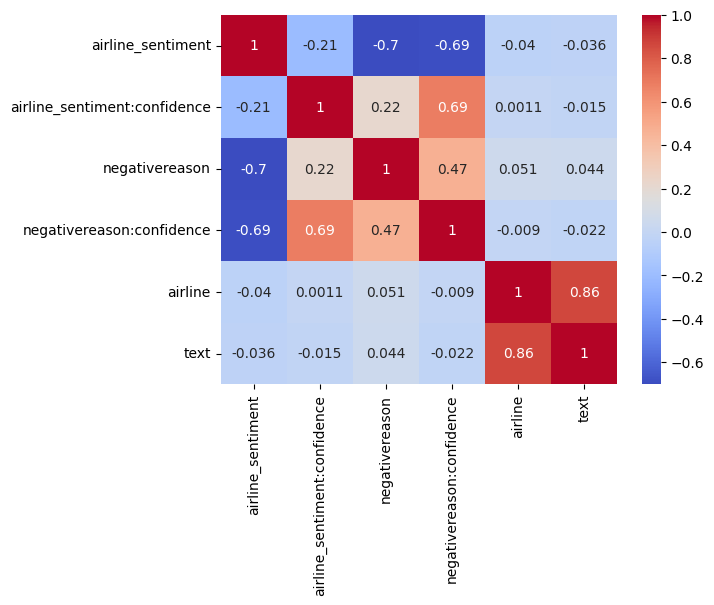

In [16]:
filtered_conf_matrix = data.corr()
sns.heatmap(filtered_conf_matrix, cmap = "coolwarm", annot=True)

In [17]:
# Get the data back and remove the columns
data = pd.read_csv("Airline_sentiment.csv", encoding = "ISO-8859-1")
drop_columns(data)

<AxesSubplot:xlabel='airline', ylabel='count'>

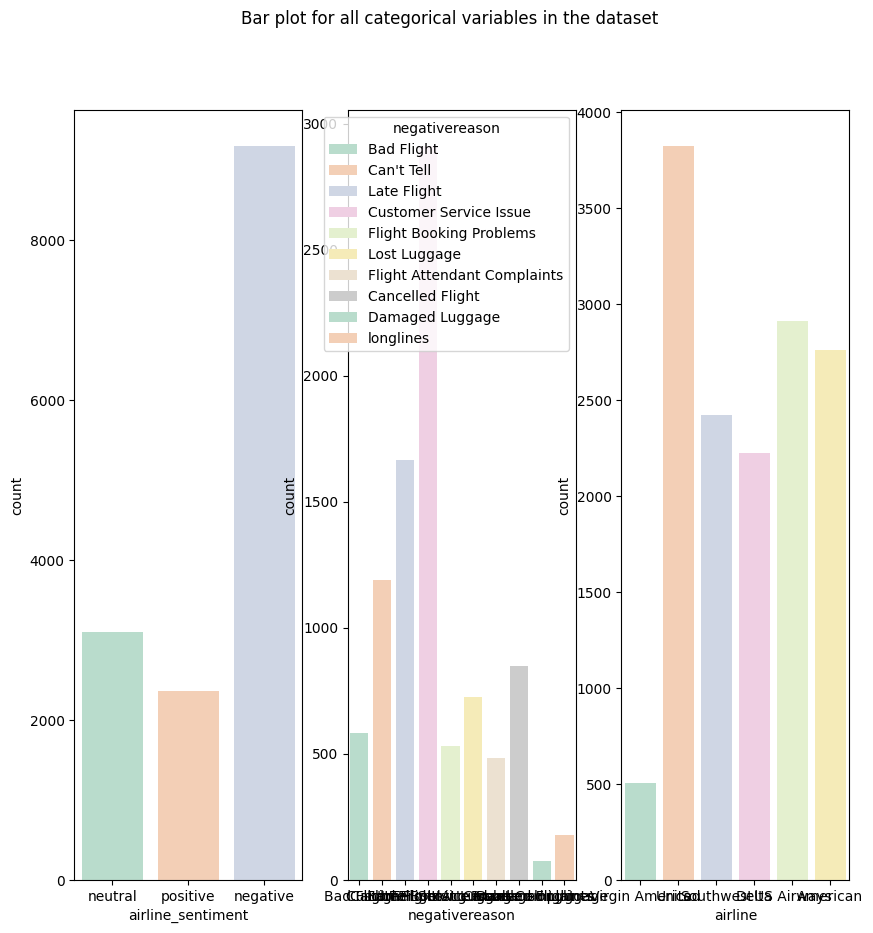

In [18]:
#Count Plot
figure, axes = plt.subplots(1, 3 ,figsize = (10, 10))
figure.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = data["airline_sentiment"], hue=data["airline_sentiment"], palette = ("Pastel2"))
sns.countplot(ax = axes[1], x = data['negativereason'], hue=data["negativereason"], palette = ("Pastel2"))
sns.countplot(ax = axes[2], x = data['airline'], hue = data["airline"], palette = ("Pastel2"))

<AxesSubplot:ylabel='airline_sentiment:confidence'>

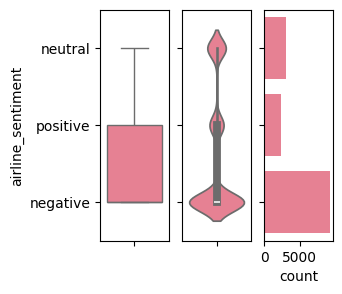

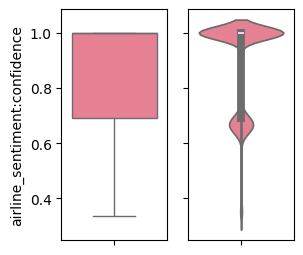

In [19]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(3, 3))
sns.boxplot(data["airline_sentiment"], ax=axes[0])
sns.violinplot(data["airline_sentiment"], ax=axes[1])
sns.countplot(data["airline_sentiment"], ax=axes[2])
_, axes2 = plt.subplots(1, 2, sharey=True, figsize=(3, 3))
sns.boxplot(data["airline_sentiment:confidence"], ax=axes2[0])
sns.violinplot(data["airline_sentiment:confidence"], ax=axes2[1])
# sns.countplot(data["airline_sentiment:confidence"], ax=axes2[2])

<AxesSubplot:ylabel='negativereason:confidence'>

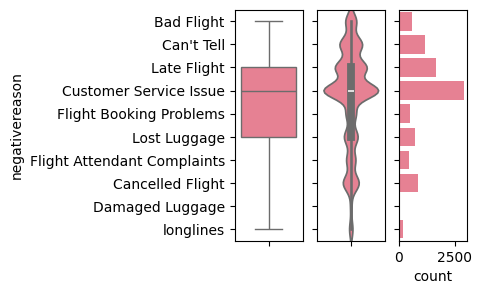

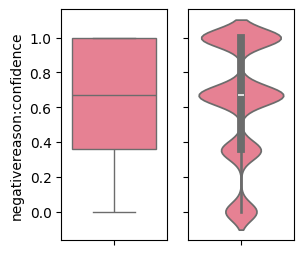

In [20]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(3, 3))
sns.boxplot(data["negativereason"], ax=axes[0])
sns.violinplot(data["negativereason"], ax=axes[1])
sns.countplot(data["negativereason"], ax=axes[2])
_, axes2 = plt.subplots(1, 2, sharey=True, figsize=(3, 3))
sns.boxplot(data["negativereason:confidence"], ax=axes2[0])
sns.violinplot(data["negativereason:confidence"], ax=axes2[1])
# sns.countplot(data["negativereason:confidence"], ax=axes2[2])

# Transformation

In [21]:
# Negative reason confidence convert to 0 because it's identified as positive or neutral
data["negativereason"].fillna("Positive/Neutral", inplace = True)
data["negativereason:confidence"].fillna(0, inplace=True)
data.head()

,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,text
0,neutral,1.0000,Positive/Neutral,0.0000,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,0.3486,Positive/Neutral,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,0.6837,Positive/Neutral,0.0000,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...


In [22]:
# Define a mapping dictionary
sentiment_mapping = {'positive': 2, 'negative': 0, 'neutral': 1}

# Apply the mapping to the 'Sentiment' column
data['sentiment_value'] = data['airline_sentiment'].map(sentiment_mapping)
data.head()

,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,text,sentiment_value
0,neutral,1.0000,Positive/Neutral,0.0000,Virgin America,@VirginAmerica What @dhepburn said.,1
1,positive,0.3486,Positive/Neutral,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2
2,neutral,0.6837,Positive/Neutral,0.0000,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,0
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,0


<AxesSubplot:xlabel='airline', ylabel='count'>

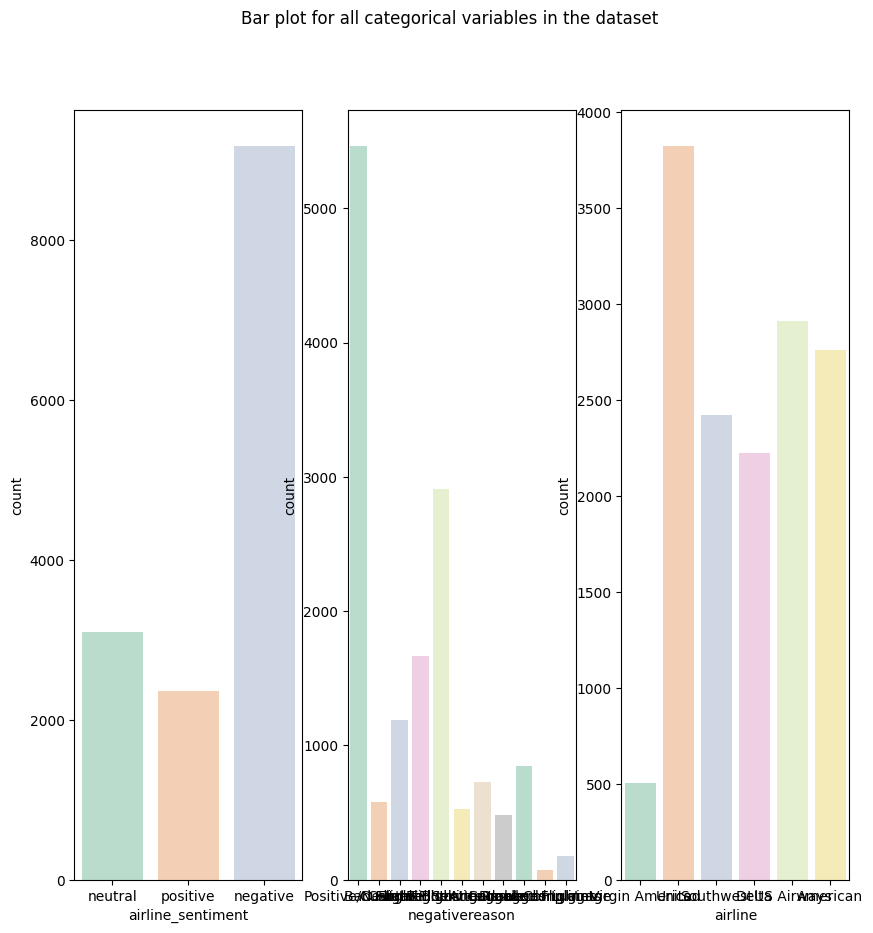

In [23]:
#Count Plot after transforming
figure, axes = plt.subplots(1, 3 ,figsize = (10, 10))
figure.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = data["airline_sentiment"], hue=data["airline_sentiment"], palette = ("Pastel2"))
sns.countplot(ax = axes[1], x = data['negativereason'], hue=data["negativereason"], palette = ("Pastel2"))
sns.countplot(ax = axes[2], x = data['airline'], hue = data["airline"], palette = ("Pastel2"))

<AxesSubplot:ylabel='negativereason:confidence'>

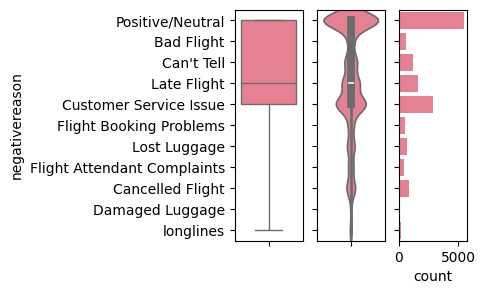

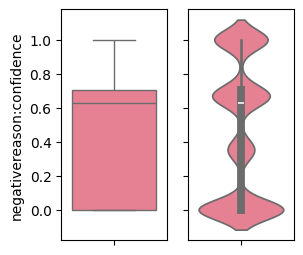

In [24]:
_, axes = plt.subplots(1, 3, sharey=True, figsize=(3, 3))
sns.boxplot(data["negativereason"], ax=axes[0])
sns.violinplot(data["negativereason"], ax=axes[1])
sns.countplot(data["negativereason"], ax=axes[2])
_, axes2 = plt.subplots(1, 2, sharey=True, figsize=(3, 3))
sns.boxplot(data["negativereason:confidence"], ax=axes2[0])
sns.violinplot(data["negativereason:confidence"], ax=axes2[1])
# sns.countplot(data["negativereason:confidence"], ax=axes2[2])

## Preprocessing text

In [25]:
import nltk
import re
# Uncomment to download "stopwords"
nltk.download("stopwords")
from nltk.corpus import stopwords
def text_preprocessing(s):
    '''To lowercase the sentence, modify 't to not, remove @ 
    and name, isolate and remove all punctuations except ?, 
    remove special characters, remove stop words except not 
    and can and remove whitespace'''
    s = s.lower()
    # Modify 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @ and name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove all punctuations except ?
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove special characters
    s = re.sub(r'([\;\:\|•«\n_ùôõñàâ¼üûî])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    return s

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
# Assign X to text and y to sentiment value after transforming to value from text
X = list(data["text"])
y = list(data["sentiment_value"])
print(len(X))

14640


In [27]:
data.head()

,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,text,sentiment_value
0,neutral,1.0000,Positive/Neutral,0.0000,Virgin America,@VirginAmerica What @dhepburn said.,1
1,positive,0.3486,Positive/Neutral,0.0000,Virgin America,@VirginAmerica plus you've added commercials t...,2
2,neutral,0.6837,Positive/Neutral,0.0000,Virgin America,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,1.0000,Bad Flight,0.7033,Virgin America,@VirginAmerica it's really aggressive to blast...,0
4,negative,1.0000,Can't Tell,1.0000,Virgin America,@VirginAmerica and it's a really big bad thing...,0


### Run the preprocess function to ensure the text is clean

In [28]:
X_train_preprocessed = ([text_preprocessing(text) for text in X])

### To compare Before and After processed text

In [29]:
for i in range(5):
    print(X_train_preprocessed[i])

said
plus added commercials experience tacky
not today must mean need take another trip
really aggressive blast obnoxious entertainment guests faces amp little recourse
really big bad thing


In [30]:
data["airline_sentiment:confidence"].describe() # To describe the confidence with mean, std, min

count    14640.000000
mean         0.900169
std          0.162830
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment:confidence, dtype: float64

In [31]:
data["negativereason:confidence"].describe() # To describe the confidence with mean, std, min

count    14640.000000
mean         0.458755
std          0.401057
min          0.000000
25%          0.000000
50%          0.624600
75%          0.703300
max          1.000000
Name: negativereason:confidence, dtype: float64

### Create the mean of sentiment_score by airlines

<AxesSubplot:title={'center':'Mean Negative Score'}, xlabel='Airlines', ylabel='Confidence'>

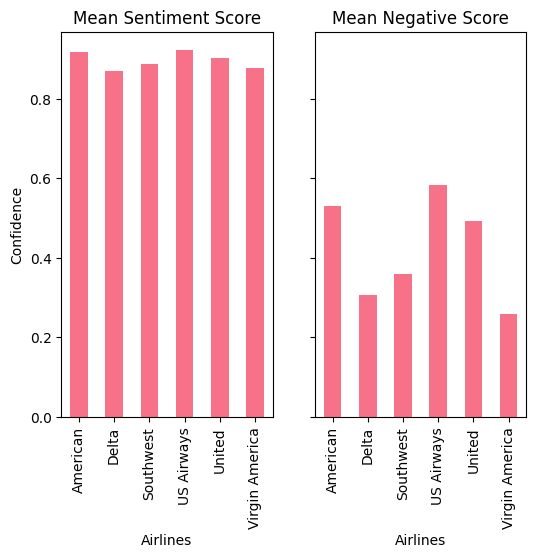

In [32]:
#Create the mean of sentiment_score by airlines
pos_mean_graph = data.groupby(['airline'])['airline_sentiment:confidence'].mean()
neg_mean_graph = data.groupby(['airline'])['negativereason:confidence'].mean()
_, axes = plt.subplots(1, 2, sharey=True, figsize=(3, 3))
pos_mean_graph.plot(kind='bar', title='Mean Sentiment Score', ylabel='Confidence',
         xlabel='Airlines', figsize=(6, 5), ax = axes[0])
neg_mean_graph.plot(kind='bar', title='Mean Negative Score', ylabel='Confidence',
         xlabel='Airlines', figsize=(6, 5), ax = axes[1])

## Generate Wordcloud for total reviews, negative, positive and neutral

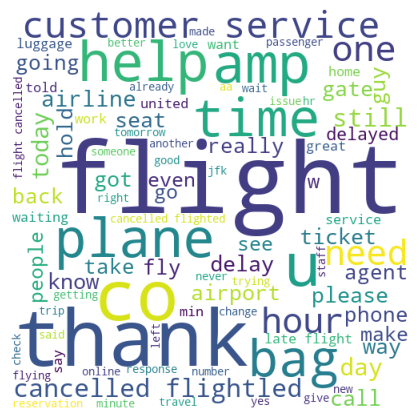

In [33]:
# Generate wordcloud 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# iterate through the csv file
def gen_wordcloud(data):
    text_review = ''
    stopwords = set(STOPWORDS)
    for val in data:
    	# typecaste each val to string
    	val = str(val)
    	# split the value
    	tokens = val.split()
    	# Converts each token into lowercase
    	for i in range(len(tokens)):
    		tokens[i] = tokens[i].lower()
    	text_review += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 500, height = 500,
    				background_color ='white',
    				stopwords = stopwords,
    				min_font_size = 12).generate(text_review)
    return wordcloud
wordcloud = gen_wordcloud(X_train_preprocessed)
# plot the cloud				 
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


In [34]:
# Classify the positive, negative and neutral reviews for wordcloud
negative_reviews = data[data["airline_sentiment"]=="negative"]["text"]
positive_reviews = data[data["airline_sentiment"]=="positive"]["text"]
neutral_reviews = data[data["airline_sentiment"]=="neutral"]["text"]

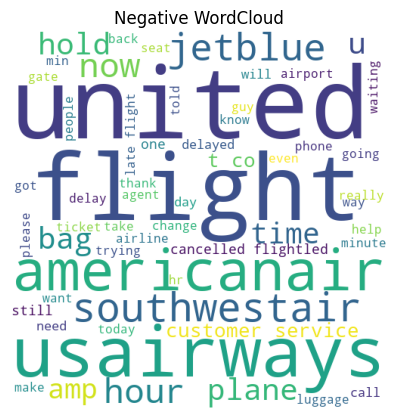

In [35]:
wordcloud_negative = gen_wordcloud(negative_reviews)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud_negative)
plt.axis("off")
plt.title("Negative WordCloud")
plt.tight_layout(pad = 0)
plt.show()

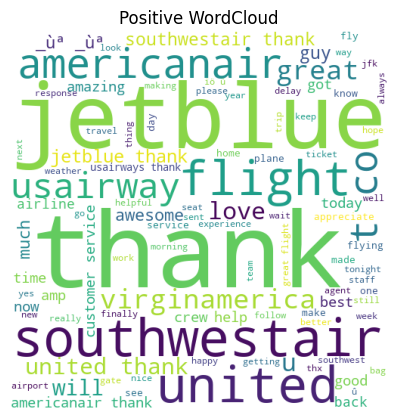

In [36]:
wordcloud_positive = gen_wordcloud(positive_reviews)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud_positive)
plt.axis("off")
plt.title("Positive WordCloud")
plt.tight_layout(pad = 0)
plt.show()

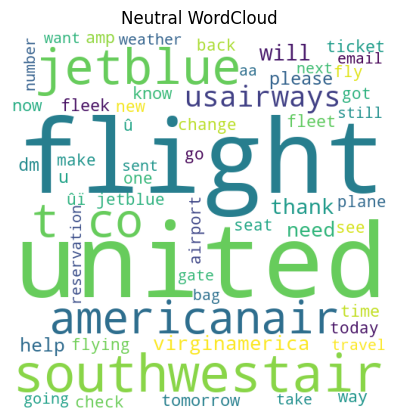

In [37]:
wordcloud_neutral = gen_wordcloud(neutral_reviews)
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud_neutral)
plt.axis("off")
plt.title("Neutral WordCloud")
plt.tight_layout(pad = 0)
plt.show()

### Pie Chart for the percentage of sentiment

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64
['neutral', 'positive', 'negative']


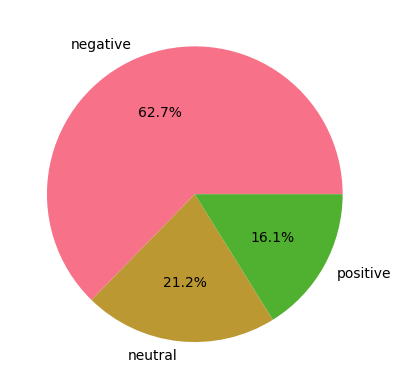

In [38]:
#Pie chart for the percentage of sentiment
print(data["airline_sentiment"].value_counts())
print(data['airline_sentiment'].unique().tolist())
plt.pie(data['airline_sentiment'].value_counts(), labels=["negative", "neutral", "positive"], autopct='%1.1f%%')
plt.show()

### Countplot for Count against airlines

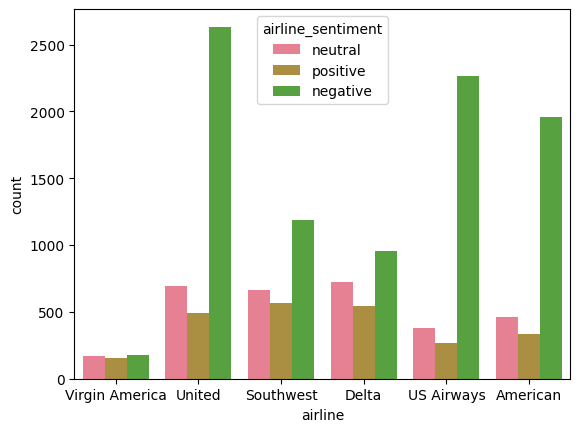

In [39]:
sns.countplot(x="airline", hue="airline_sentiment", data=data);

## To show most frequent word, bigrams (two words) and trigrams (three words)

In [40]:
def corpus(text):
    text_list = text.split()
    return text_list

In [41]:
preprocessed = pd.Series(X_train_preprocessed)
data['airline_text_lists'] = preprocessed.apply(corpus)

In [42]:
from tqdm import trange
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['airline_text_lists'][i]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 14640/14640 [00:00<00:00, 190132.47it/s]


In [43]:
from collections import Counter
mostCommon = Counter(corpus).most_common(10)

In [44]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

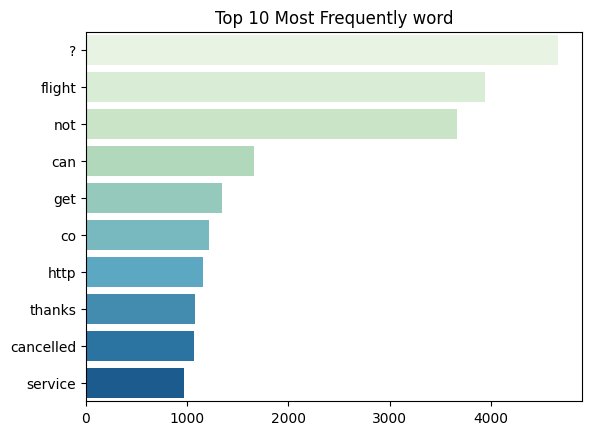

In [45]:
sns.barplot(x=freq, y=words, hue=words, palette = ("GnBu"))
plt.title('Top 10 Most Frequently word')
plt.show()

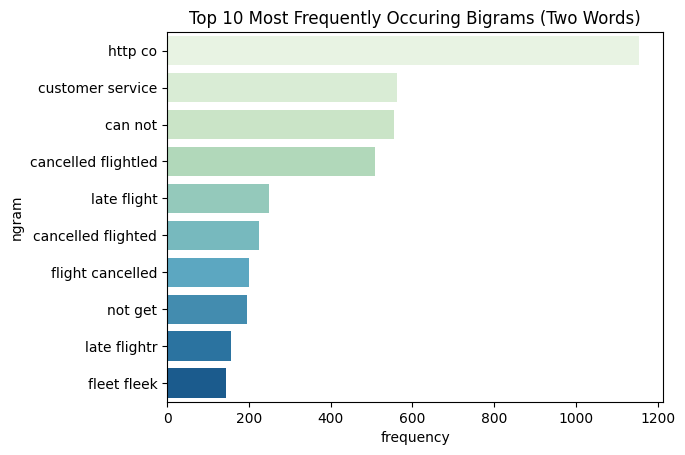

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
preprocessed = pd.Series(X_train_preprocessed)
count_vector_2 = CountVectorizer(ngram_range=(2,2))
bigrams = count_vector_2.fit_transform(preprocessed)
count = bigrams.toarray().sum(axis=0)
bigram_freq = pd.DataFrame(sorted([(count[i], k) for k, i in count_vector_2.vocabulary_.items()], reverse = True))
bigram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=bigram_freq['frequency'][:10], y=bigram_freq['ngram'][:10], hue=bigram_freq['ngram'][:10], palette = ("GnBu"))
plt.title('Top 10 Most Frequently Occuring Bigrams (Two Words)')
plt.show()

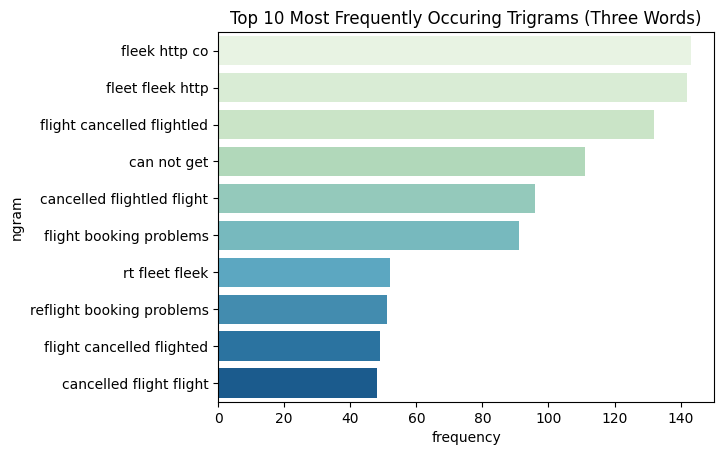

In [47]:
count_vector_3 = CountVectorizer(ngram_range=(3,3))
trigrams = count_vector_3.fit_transform(preprocessed)
count = trigrams.toarray().sum(axis=0)
trigram_freq = pd.DataFrame(sorted([(count[i], k) for k, i in count_vector_3.vocabulary_.items()], reverse = True))
trigram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=trigram_freq['frequency'][:10], y=trigram_freq['ngram'][:10], hue=trigram_freq['ngram'][:10], palette = ("GnBu"))
plt.title('Top 10 Most Frequently Occuring Trigrams (Three Words)')
plt.show()

In [48]:
data.describe()

,airline_sentiment:confidence,negativereason:confidence,sentiment_value
count,14640.000000,14640.000000,14640.000000
mean,0.900169,0.458755,0.534495
std,0.162830,0.401057,0.756084
min,0.335000,0.000000,0.000000
25%,0.692300,0.000000,0.000000
50%,1.000000,0.624600,0.000000
75%,1.000000,0.703300,1.000000
max,1.000000,1.000000,2.000000


### To view the total airline sentiment count for each classes

14640


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

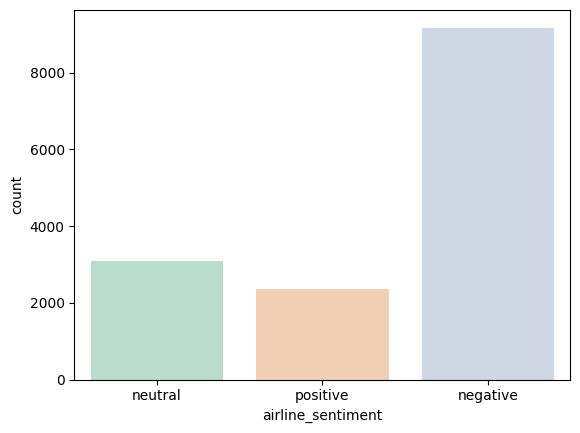

In [49]:
# To view the total airline sentiment count for each classes
import matplotlib.pyplot as plt
import pandas as pd
print(len(data))
sns.countplot(x=data['airline_sentiment'], hue=data["airline_sentiment"], palette = ("Pastel2"))


### Total count of airlines tweet category by airlines

Text(0.5, 1.0, 'Total count of airlines tweet category by airlines')

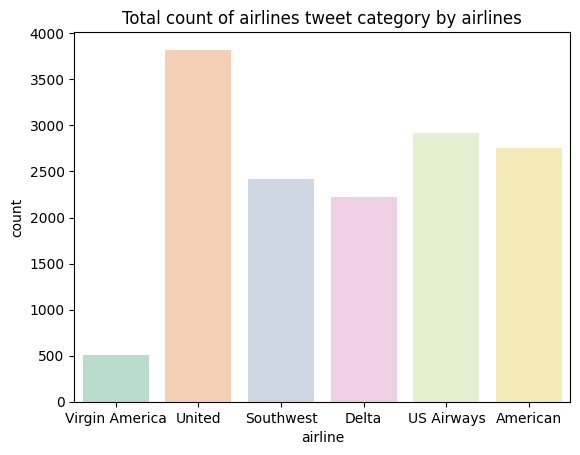

In [50]:
#Total count of airlines tweet category by airlines
import matplotlib.pyplot as plt
import pandas as pd
sns.countplot(x=data['airline'], hue=data["airline"], palette = ("Pastel2"))
plt.title("Total count of airlines tweet category by airlines")

## To find the worst ranking airlines and best ranking airlines

In [51]:
is_positive = data['airline_sentiment'].str.contains("positive")
is_negative = data['airline_sentiment'].str.contains("negative")
is_neutral = data['airline_sentiment'].str.contains("neutral")
negative_tweets = data[is_negative]
worst_airline = negative_tweets[['airline','negativereason:confidence','negativereason']]

In [52]:
# To find the worst ranking for the airlines
worst_ranking = worst_airline.groupby('airline', as_index=False).count()
worst_ranking = worst_ranking.sort_values('negativereason', ascending=False)
worst_ranking

,airline,negativereason:confidence,negativereason
4,United,2633,2633
3,US Airways,2263,2263
0,American,1960,1960
2,Southwest,1186,1186
1,Delta,955,955
5,Virgin America,181,181


### Worst Ranking Airlines

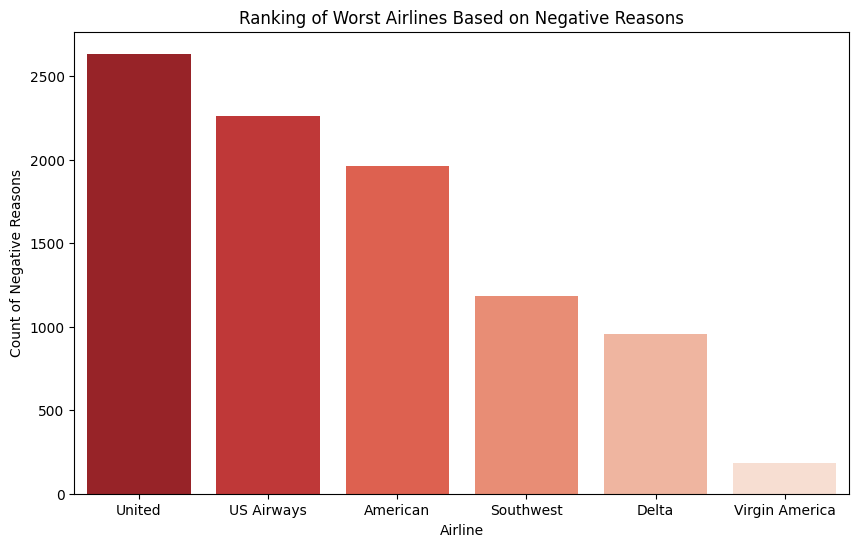

In [53]:
# To Plot the Worst Airlines
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='negativereason', data=worst_ranking, hue = 'airline', palette=("Reds_r"))
plt.title('Ranking of Worst Airlines Based on Negative Reasons')
plt.xlabel('Airline')
plt.ylabel('Count of Negative Reasons')
plt.show()

In [54]:
# To find the best ranking
positive_tweets = data[is_positive]
best_airline = positive_tweets[['airline','airline_sentiment:confidence','airline_sentiment']]
best_ranking = best_airline.groupby('airline', as_index=False).count()
best_ranking = best_ranking.sort_values('airline_sentiment', ascending=False)
best_ranking

,airline,airline_sentiment:confidence,airline_sentiment
2,Southwest,570,570
1,Delta,544,544
4,United,492,492
0,American,336,336
3,US Airways,269,269
5,Virgin America,152,152


### Best Ranking Airlines based on positive sentiment

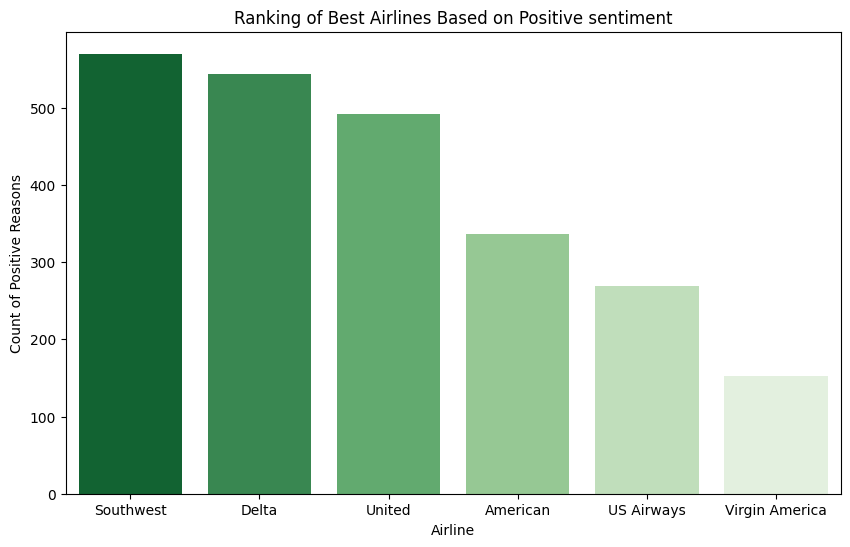

In [55]:
# Plot the bar chart based on the ranking for best airlines
plt.figure(figsize=(10, 6))
sns.barplot(x='airline', y='airline_sentiment', data=best_ranking, hue = 'airline', palette = ("Greens_r"))
plt.title('Ranking of Best Airlines Based on Positive sentiment')
plt.xlabel('Airline')
plt.ylabel('Count of Positive Reasons')
plt.show()

# Modelling Prediction

In [56]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

## Select the Bert Model and Tokenizer

In [57]:
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=3)
#Loading a pretrain model while specifying the number of labels in our dataset for fine-tuning  
#camembert-base, roberta-base, xlnet-base-cased,bert-base-multilingual-cased
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3)
# Import the tokenizer from transformers library
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Model Info using Cuda

In [58]:
# Model Info using Cuda
model = model.to('cuda')
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

## Split the data to train dataset and validation dataset

In [59]:
# Split the data to train dataset and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train_preprocessed, y, test_size=0.2, random_state = 2020)
print(len(X_train_preprocessed))
print(len(X_train))
print(len(X_val))

14640
11712
2928


In [60]:
# RandonUnderSampler Testing Code
# from imblearn.under_sampling import RandomUnderSampler
# import seaborn as sns
# ros = RandomUnderSampler(random_state=42)
# import numpy as np
# X_train = np.array(X_train)
# y_train = np.array(y_train)
# X_train = X_train.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# # X_train, y_train = oversample.fit_resample(X_train, y_train)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print(len(data))
# print(type(X_train))
# sns.countplot(x=y_train)

14640
<class 'numpy.ndarray'>


<AxesSubplot:ylabel='count'>

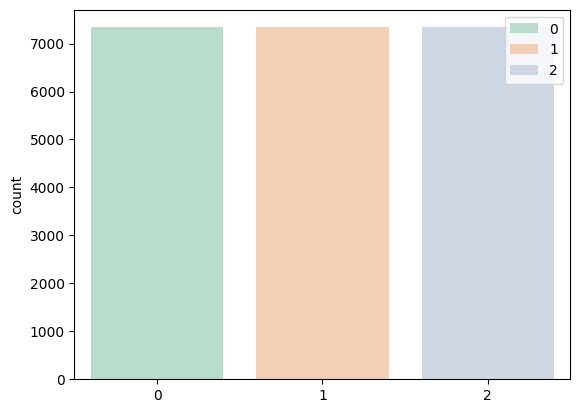

In [61]:
# To Balance the Dataset by using oversampling
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
ros = RandomOverSampler(random_state=42)
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
# X_train, y_train = oversample.fit_resample(X_train, y_train)
X_train, y_train = ros.fit_resample(X_train, y_train)
print(len(data))
print(type(X_train))
sns.countplot(x=y_train, hue = y_train, palette = ("Pastel2"))


In [62]:
X_train = X_train.flatten().tolist()
y_train = y_train.flatten().tolist()

In [63]:
# # Comparison with Logistic Regression
# from sklearn.feature_extraction.text import CountVectorizer
# # Convert the text to a bag-of-words representation
# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(X_train)
# X_val = vectorizer.transform(X_val)
# from sklearn.linear_model import LogisticRegression

# # Train a logistic regression classifier
# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = classifier.predict(X_val)
# print(y_pred)

# # Evaluate the accuracy of the classifier
# accuracy = accuracy_score(y_val,y_pred)
# print("Accuracy:", accuracy)

## Tokenizer on Train and Validation dataset

In [64]:
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [65]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [66]:
print(X_train_tokenized['attention_mask'][0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [67]:
len(X_train),len(X_val)

(22017, 2928)

### Create dataset for torch that will load the train and validation dataset for training

In [68]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])
        
# class RegressionDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         item = {key: torch.tensor(val[idx], dtype=torch.float32) for key, val in self.encodings.items()}
#         item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float32)
#         return item

#     def __len__(self):
#         return len(self.labels)

In [69]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)

In [70]:
train_dataset[5]

{'input_ids': tensor([  101,  2748,  2288,  4796,  4919,  2356,  4272, 12532,  4648,  4726,
          3328,  2627,  3626,  4261,  2094,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'labels': tensor(0)}

### To Check Whether Cuda is Available

In [71]:
import torch
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print("Using GPU.")
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")
model.to(device)

Using GPU.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

### Metrics for Classification include accuracy, recall, precision and f1

In [72]:
# Metrics for Classificaton
def compute_metrics(p):
    print(type(p))
    pred, labels = p
    pred = np.argmax(pred, axis=1)

    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred,average='weighted')
    precision = precision_score(y_true=labels, y_pred=pred,average='weighted')
    f1 = f1_score(y_true=labels, y_pred=pred,average='weighted')
    
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1}

# For regression problem
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# import numpy as np
# import evaluate

# accuracy = evaluate.load("accuracy")


# def compute_metrics_for_regression(eval_pred):
#     logits, labels = eval_pred
#     labels = labels.reshape(-1, 1)
    
#     mse = mean_squared_error(labels, logits)
#     mae = mean_absolute_error(labels, logits)
#     rmse = round(np.sqrt(mse),2)
#     r2 = r2_score(labels, logits)
#     single_squared_errors = ((logits - labels).flatten()**2).tolist()
    
#     # Compute accuracy 
#     # Based on the fact that the rounded score = true score only if |single_squared_errors| < 0.5
#     accuracy = sum([1 for e in single_squared_errors if e < 0.5]) / len(single_squared_errors)
    
#     return {"mse": mse, "rmse": rmse, "mae": mae, "r2": r2, "accuracy": accuracy}
    
# Regression method
# import torch

# class RegressionTrainer(Trainer):
#     def compute_loss(self, model, inputs, return_outputs=False):
#         labels = inputs.pop("labels")
#         outputs = model(**inputs)
#         logits = outputs[0][:, 0]
#         loss = torch.nn.functional.mse_loss(logits, labels)
#         return (loss, outputs) if return_outputs else loss

In [73]:
from transformers import TrainingArguments, Trainer
from torch.utils.data import DataLoader

training_args = TrainingArguments(
    output_dir="out8",
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    logging_strategy="epoch",
    evaluation_strategy="epoch",
    num_train_epochs=30,
    save_strategy="epoch",
    load_best_model_at_end=True,
    learning_rate=2e-5,
    weight_decay=0.01,
    metric_for_best_model="Accuracy",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

In [74]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1-score
1,0.523800,0.528788,0.796448,0.827244,0.796448,0.804897
2,0.227500,0.645326,0.825478,0.823495,0.825478,0.824105
3,0.124300,0.816910,0.817623,0.812558,0.817623,0.810168
4,0.084800,0.951748,0.811475,0.826636,0.811475,0.816452
5,0.059700,1.066879,0.821721,0.820092,0.821721,0.820779
6,0.049700,1.122286,0.820697,0.820834,0.820697,0.820741
7,0.036700,1.255102,0.825478,0.820164,0.825478,0.821452
8,0.036100,1.276724,0.825820,0.825716,0.825820,0.825741
9,0.028300,1.292847,0.826844,0.822933,0.826844,0.824317
10,0.026800,1.419237,0.824112,0.818240,0.824112,0.818290


<class 'transformers.trainer_utils.EvalPrediction'>


Checkpoint destination directory out8\checkpoint-689 already exists and is non-empty.Saving will proceed but saved results may be invalid.


<class 'transformers.trainer_utils.EvalPrediction'>


Checkpoint destination directory out8\checkpoint-1378 already exists and is non-empty.Saving will proceed but saved results may be invalid.


<class 'transformers.trainer_utils.EvalPrediction'>


Checkpoint destination directory out8\checkpoint-2067 already exists and is non-empty.Saving will proceed but saved results may be invalid.


<class 'transformers.trainer_utils.EvalPrediction'>


Checkpoint destination directory out8\checkpoint-2756 already exists and is non-empty.Saving will proceed but saved results may be invalid.


<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'transformers.trainer_utils.EvalPrediction'>
<class 'tran

TrainOutput(global_step=20670, training_loss=0.05163913559786756, metrics={'train_runtime': 1163.4094, 'train_samples_per_second': 567.737, 'train_steps_per_second': 17.767, 'total_flos': 1.425613247817948e+16, 'train_loss': 0.05163913559786756, 'epoch': 30.0})

In [75]:
trainer.evaluate()

<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 1.6841952800750732,
 'eval_Accuracy': 0.8275273224043715,
 'eval_Precision': 0.8222856868810343,
 'eval_Recall': 0.8275273224043715,
 'eval_F1-Score': 0.8237741330682702,
 'eval_runtime': 1.3064,
 'eval_samples_per_second': 2241.234,
 'eval_steps_per_second': 70.421,
 'epoch': 30.0}

## Evaluation on Accuracy, Precision, Recall and F1-Score Graph

30
30


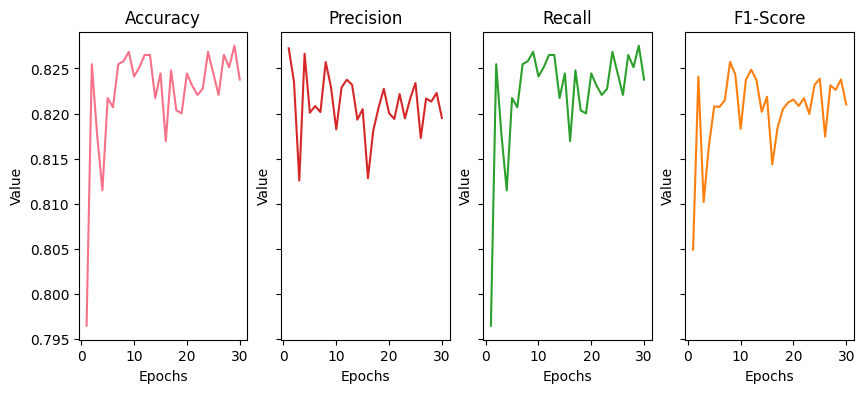

In [76]:
log_history = trainer.state.log_history
# Extract evaluation metrics and epoch information
eval_accuracy = [entry.get('eval_Accuracy', None) for entry in log_history]
eval_precision = [entry.get('eval_Precision', None) for entry in log_history]
eval_recall = [entry.get('eval_Recall', None) for entry in log_history]
eval_f1 = [entry.get('eval_F1-Score', None) for entry in log_history]
epochs = [entry['epoch'] for entry in log_history if 'epoch' in entry]
eval_accuracy = [value for value in eval_accuracy if value is not None]
eval_accuracy = eval_accuracy[:-1]
eval_precision = [value for value in eval_precision if value is not None]
eval_precision = eval_precision[:-1]
eval_recall = [value for value in eval_recall if value is not None]
eval_recall = eval_recall[:-1]
eval_f1 = [value for value in eval_f1 if value is not None]
eval_f1 = eval_f1[:-1]
# function to get unique values
def unique(list1):
    # initialize a null list
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
epochs = unique(epochs)
print(len(epochs))
print(len(eval_accuracy))
# Plot the evaluation metrics over epochs
_, axes = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
axes[0].plot(epochs, eval_accuracy)
axes[1].plot(epochs, eval_precision,'tab:red')
axes[2].plot(epochs, eval_recall,'tab:green')
axes[3].plot(epochs, eval_f1, 'tab:orange')
axes[0].set_title("Accuracy")
axes[1].set_title("Precision")
axes[2].set_title("Recall")
axes[3].set_title("F1-Score")
for i in range (4):
    axes[i].set(xlabel= 'Epochs', ylabel = "Value")
plt.show()

In [77]:
np.set_printoptions(suppress=True)

In [78]:
text = "@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?4"
inputs = tokenizer(text_preprocessing(text),padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model(**inputs)
print("outputs:",outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print("prediction: ",predictions)
predictions = predictions.cpu().detach().numpy()
predictions
# Find the highest predictions
index_prediction = np.argmax(predictions)
highest_prediction = np.max(predictions)

if index_prediction == 0:
    print("Sentiment Result: Negative \nPrediction value:", highest_prediction)
elif index_prediction == 1:
    print("Sentiment Result: Neutral \nPrediction value:", highest_prediction)
elif index_prediction == 2:
    print("Sentiment Result: Positive \nPrediction:", highest_prediction)

outputs: SequenceClassifierOutput(loss=None, logits=tensor([[-3.2807,  7.6964, -2.8703]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
prediction:  tensor([[1.7087e-05, 9.9996e-01, 2.5759e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
Sentiment Result: Neutral 
Prediction value: 0.9999572


In [79]:
trainer.save_model('BDA_Bert_Final_Model1')

In [80]:
model_2 = BertForSequenceClassification.from_pretrained("BDA_Bert_Final_Model1")
model_2.to('cuda')

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [82]:
# text = "That was good point"
import torch
text = "this is great news!  America could start flights to Hawaii by end of year http://t.co/r8p2Zy3fe4 via @Pacificbiznews"
inputs = tokenizer(text,padding = True, truncation = True, return_tensors='pt').to('cuda')
outputs = model_2(**inputs)
print("outputs:",outputs)
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
predictions = predictions.cpu().detach().numpy()
# Find the highest predictions
index_prediction = np.argmax(predictions)
highest_prediction = np.max(predictions)

if index_prediction == 0:
    print("Sentiment Result: Negative \nPrediction value:", highest_prediction)
elif index_prediction == 1:
    print("Sentiment Result: Neutral \nPrediction value:", highest_prediction)
elif index_prediction == 2:
    print("Sentiment Result: Positive \nPrediction:", highest_prediction)

outputs: SequenceClassifierOutput(loss=None, logits=tensor([[-3.8136, -3.3613,  6.5786]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
Sentiment Result: Positive 
Prediction: 0.9999212
